In [ ]:
!pip install scikit-fuzzy --upgrade

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import skfuzzy as skfuzzy

base = pd.read_csv('credit_card_clients.csv', header = 0)
base.shape

(30000, 25)

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


In [ ]:
X = base.iloc[:, [1,25]].values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(30000, 2)

In [ ]:
X.T.shape

(2, 30000)

In [ ]:
r = skfuzzy.cmeans(data = X.T,
                   c = 3, m = 2,
                   error=0.005,
                   maxiter=1000,
                   init=None)

In [ ]:
r

(array([[ 0.74992205,  2.01651798],
        [ 0.97507011, -0.42056076],
        [-0.73894182, -0.30171674]]),
 array([[0.02592049, 0.02732401, 0.00499213, ..., 0.0149147 , 0.01405808,
         0.00906002],
        [0.0622669 , 0.12409261, 0.01587919, ..., 0.03497852, 0.0298144 ,
         0.01801159],
        [0.91181261, 0.84858338, 0.97912868, ..., 0.95010678, 0.95612752,
         0.97292839]]),
 array([[0.28884156, 0.56865668, 0.33158738, ..., 0.29032668, 0.18486659,
         0.29665363],
        [0.30590679, 0.1370951 , 0.17990042, ..., 0.01279732, 0.25748412,
         0.26777185],
        [0.40525164, 0.29424823, 0.48851221, ..., 0.696876  , 0.55764929,
         0.43557452]]),
 array([[3.29975825, 2.90536187, 2.8044266 , ..., 3.12012172, 2.47574223,
         2.68915974],
        [2.12899717, 1.36332532, 1.57243506, ..., 2.03740811, 1.70002495,
         1.90723911],
        [0.55635361, 0.52134499, 0.20024748, ..., 0.39092421, 0.30019984,
         0.25950203]]),
 array([25716.999561

In [ ]:
previsoes_porcentagem = r[1]

In [ ]:
previsoes_porcentagem.shape

(3, 30000)

In [ ]:
previsoes_porcentagem

array([[0.02592049, 0.02732401, 0.00499213, ..., 0.0149147 , 0.01405808,
        0.00906002],
       [0.0622669 , 0.12409261, 0.01587919, ..., 0.03497852, 0.0298144 ,
        0.01801159],
       [0.91181261, 0.84858338, 0.97912868, ..., 0.95010678, 0.95612752,
        0.97292839]])

In [ ]:
previsoes_porcentagem[0][0]

0.025920487378100227

In [ ]:
previsoes_porcentagem[1][0]

0.06226689947518592

In [ ]:
previsoes_porcentagem[2][0]

0.9118126131467138

In [ ]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [ ]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [ ]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
previsoes[5000]

2

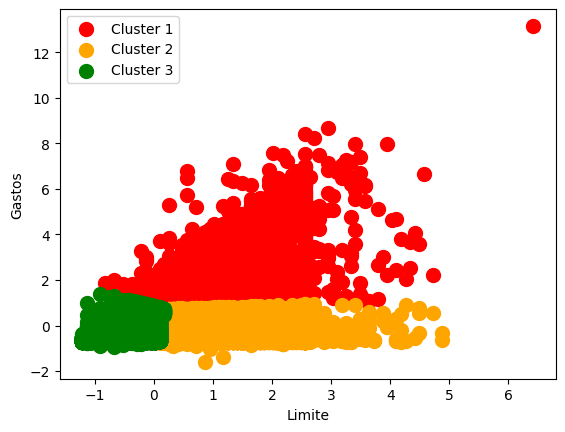

In [ ]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()